In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os, certifi

# This ensures Python uses certifi's trusted CA bundle
os.environ['SSL_CERT_FILE'] = certifi.where()

# Example: Autoencoder for MNIST dataset (images 28x28)

# Load data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to vectors
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

# Define the size of the encoded representation
encoding_dim = 64

# Input placeholder
input_img = layers.Input(shape=(28*28,))

# Encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Reconstruction of the input
decoded = layers.Dense(28*28, activation='sigmoid')(encoded)

# Autoencoder model maps input to reconstruction
autoencoder = models.Model(input_img, decoded)

# Encoder model (input to encoded representation)
encoder = models.Model(input_img, encoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3501 - val_loss: 0.1646
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1542 - val_loss: 0.1274
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1233 - val_loss: 0.1092
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1074 - val_loss: 0.0979
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0971 - val_loss: 0.0904
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0901 - val_loss: 0.0851
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0851 - val_loss: 0.0816
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0817 - val_loss: 0.0792
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0794 - val_loss: 0.0774
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0779 - val_loss: 0.0763
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0767 - val_loss: 0.0754
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [7]:
from functions import synthetic_subspace
from tensorflow.keras import layers, models

D = 100     # ambient space dimension
d = 10      # intrinsic subspace dimension
n = 10000   # number of data points

X = synthetic_subspace(D, d, n, signal_scale=1.0, noise_scale=0.05)

# Normalize to [0, 1] for sigmoid output
X = (X - X.min()) / (X.max() - X.min())

# Split into train/test
split = int(0.8 * n)
x_train, x_test = X[:split], X[split:]

# Autoencoder
encoding_dim = d  # ideally match true subspace dimension

input_layer = layers.Input(shape=(D,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(D, activation='sigmoid')(encoded)

autoencoder = models.Model(input_layer, decoded)
encoder = models.Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')  # MSE better for continuous values

# Train
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Get encoded representations
encoded_data = encoder.predict(x_test)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.0075 - val_loss: 0.0072
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.0070 - val_loss: 0.0067
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.0058 - val_loss: 0.0056
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.0055 - val_loss: 0.0055
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.0055 - val_loss: 0.0055
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss:

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1096 - val_loss: 0.9174
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8613 - val_loss: 0.7465
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6852 - val_loss: 0.5695
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.5184 - val_loss: 0.4278
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3884 - val_loss: 0.3461
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3264 - val_loss: 0.3114
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3003 - val_loss: 0.2942
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2866 - val_loss: 0.2820
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.2714 - val_loss: 0.2707
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2604 - val_loss: 0.2594
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2492 - val_loss: 0.2482
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2337 - va

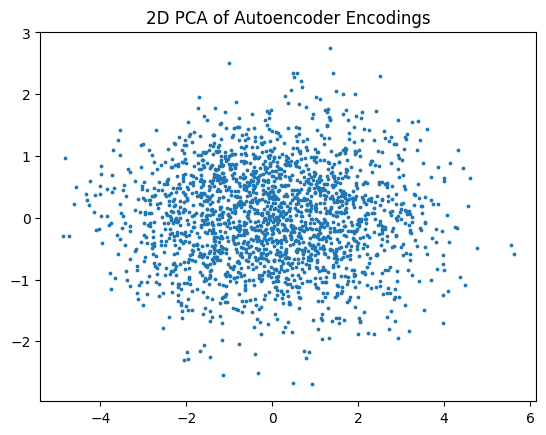

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Subspace generator
def synthetic_subspace_with_points(D, d, n, signal_scale=1, noise_scale=0.05):
    assert D >= d, "Ambient dimension D must be >= subspace dimension d"
    random_matrix = np.random.randn(D, d)
    Q, _ = np.linalg.qr(random_matrix)
    points_subspace = np.random.randn(n, d) * signal_scale
    X = points_subspace @ Q.T
    X += np.random.randn(n, D) * noise_scale
    return X, points_subspace

# Parameters
D, d, n = 100, 10, 10000
X, true_subspace_points = synthetic_subspace_with_points(D, d, n)

# Normalize (feature-wise)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train/test split
split = int(0.8 * n)
x_train, x_test = X[:split], X[split:]
true_train_points = true_subspace_points[:split]
true_test_points = true_subspace_points[split:]

# Train autoencoder here
encoding_dim = d  # match true latent dim if desired
input_dim = D

# Build autoencoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='linear')(encoded)  # linear for unbounded reconstruction

autoencoder = models.Model(input_layer, decoded)
encoder = models.Model(input_layer, encoded)

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')  # MSE is better for synthetic continuous data
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# After training:
encoded_data = encoder.predict(x_test)

# Compare learned encodings to true subspace points
reg = LinearRegression().fit(encoded_data, true_test_points)
print("R² score:", reg.score(encoded_data, true_test_points))

# Optional: visualize encoded points
from sklearn.decomposition import PCA
Z = PCA(n_components=2).fit_transform(encoded_data)
plt.scatter(Z[:, 0], Z[:, 1], s=3)
plt.title("2D PCA of Autoencoder Encodings")
plt.show()
